In [28]:
import numpy as np
import pandas as pd
import os
import rebound
os.chdir('../src')

import tools
import run_reb
import hard_coded_constants as C

In [51]:
data = pd.read_csv('../data/data_files/DEEP.csv')
filename='DEEP'
planet_id = {1: 'mercury', 2: 'venus', 3: 'earth', 4: 'mars', 5: 'jupiter', 6: 'saturn', 7: 'uranus', 8: 'neptune'}
planet_id = {5: 'jupiter', 6: 'saturn', 7: 'uranus', 8: 'neptune'}
clones=0
GM_SS = C.SS_GM[0]
AU = 1.496e8
yr = 365*24*60*60
dt = C.dt
GM_new = GM_SS/AU**3*yr**2
print(GM_new)

for i, objname in enumerate(data['Name']):
    smas = data['smas'].iloc[i]
    eccs = data['eccs'].iloc[i]
    incs = data['incs'].iloc[i]/180*np.pi
    aops = data['aops'].iloc[i]/180*np.pi
    lans = data['lans'].iloc[i]/180*np.pi
    epoch = data['epoch'].iloc[i]
    Tps = data['Tps'].iloc[i]
    P = smas**1.5*365*24
    #print(epoch,Tps,P)
    M = 2*np.pi*(epoch-Tps)/P
    flag, x, y, z, vx, vy, vz = tools.aei_to_xv(GM=GM_new, a=smas, e=eccs, inc=incs, node=lans, argperi=aops, ma=M)
    
    obj_directory = '../data/'+filename+'/'+str(objname)
    os.makedirs(obj_directory, exist_ok=True)
    flag, epoch, sim = run_reb.initialize_simulation_from_sv(planets=list(planet_id.values()), des=str(objname), clones=clones,sb=[epoch,x,y,z,vx,vy,vz])
    
    # Save the initial state to an archive file
    archive_file = os.path.join(obj_directory, "archive.bin")
    sim.save(archive_file)


39.42122062007922


(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

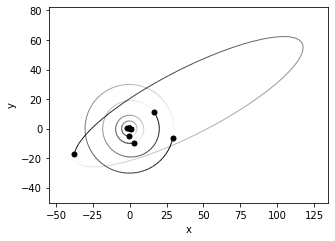

In [34]:
sim = rebound.SimulationArchive('../data/DEEP/0/archive.bin')

rebound.OrbitPlot(sim[0])

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

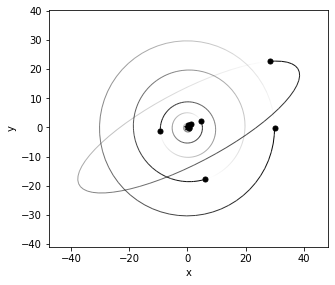

In [44]:
sim = rebound.SimulationArchive('../data/DEEP/0/archive.bin')

rebound.OrbitPlot(sim[44])